<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Linear_Regression_Startup_Assignment_280329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karthickveerakumar/startup-logistic-regression")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/karthickveerakumar/startup-logistic-regression/versions/1


In [20]:
# insurance dataset
df = pd.read_csv("/root/.cache/kagglehub/datasets/karthickveerakumar/startup-logistic-regression/versions/1/50_Startups.csv")

#Loading first 5 rowa of the dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
df["State"].value_counts().head()

,count
State,
New York,17
California,17
Florida,16


In [22]:
state_mapping = {'New York': 1, 'California': 2, 'Florida': 3}
df['State'] = df['State'].replace(state_mapping)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [23]:
df["State"].value_counts().head()

,count
State,
1,17
2,17
3,16


In [5]:
# check duplicated records

df.duplicated().sum()

np.int64(0)

In [6]:
# check for null values
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
State,50.0,1.9800,0.820403,1.00,1.0000,2.000,3.0000,3.00
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [ ]:
'''
1. for 'R&D Spend' and 'Marketing Spend' Mean is almost equal to Meadian so data is normally distributed
2. for 'Administration' mean is smaller than Median, implying that there are outliers in left tail
3. for 'Profit', mean is greater than median, implying that there are outliers in right tail
'''


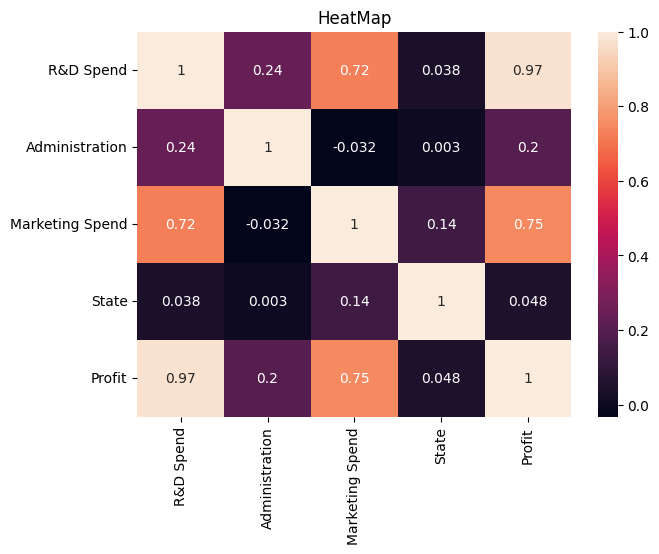

In [26]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.title('HeatMap')
plt.show()

In [ ]:
'''
'Profit' has a Strong correlation with the 'R&D Spend' and 'Marketing Spend'
Also 'Profit' and 'Administration' has a weak correlationship

'Marketing Spend' and 'R&D Spend' have a strong correlationship
'''

In [ ]:
'''
StartUp dataset
---------------------------

**Data Set Characteristics:**

    :Number of Instances: 50

    :Number of Attributes: 5 numeric/categorical predictive. Median Value (attribute 5) is usually the target.

    :Attribute Information (in order):
        -  R&D Spend
        -  Administration
        -  Marketing Spend
        -   State
        -   Profit

    Missing Attribute Values: None

'''

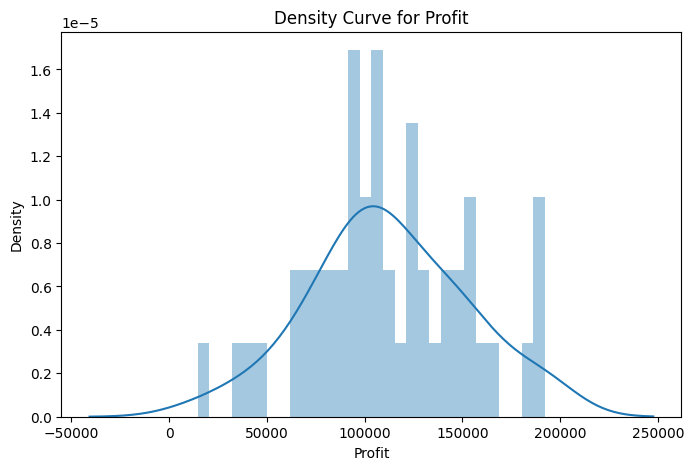

In [27]:
# Outlier Analysis on Target Variable
plt.figure(figsize = (8, 5))
sns.distplot(df['Profit'], bins = 30)
plt.title('Density Curve for Profit')
plt.show()

In [ ]:
# R&D Spend and Marketing Spend could be the possible input features
# Administration is having the weak relationship w.r.t Target variable
# hence it would not be there in the ML model

In [ ]:
'''
We will create below model ->
1) R&D Spend -> Profit (Simple Linear Regression)
2) R&D Spend, Marketing Spend -> Profit (Multiple Linear Regression)
'''

# Simple Linear Regression

In [28]:
# Seperating input and output features
X = df['R&D Spend'].to_numpy().reshape(-1, 1)
y = df['Profit']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [30]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [32]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.97
Training R2 Score : 0.94


In [33]:
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training RMSE : 9788.95
Testing RMSE : 6557.49


# Multiple Linear Regression

In [36]:
# Seperating input and output features
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [37]:
# Initializing the model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Taking predictions from the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [39]:
# Model Evaluation
print('Testing R2 Score :', np.round(metrics.r2_score(y_test, y_pred), 2))
print('Training R2 Score :', np.round(metrics.r2_score(y_train, y_train_pred), 2))

Testing R2 Score : 0.97
Training R2 Score : 0.94


In [40]:
print('Training RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 2))
print('Testing RMSE :', np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

Training RMSE : 9358.58
Testing RMSE : 7073.86
